In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("traffic_accident.txt")
df.head(2)

seq\tsex\tserious_yn\tage
0                1\tM\tN\t3
1                2\tM\tN\t6

In [3]:
df = pd.read_csv("traffic_accident.txt", sep = "\t")
df.head(2)

seq sex serious_yn  age
0    1   M          N    3
1    2   M          N    6

In [4]:
from scipy.stats import chi2_contingency

In [5]:
chi2_contingency(df["sex"], df["serious_yn"])

TypeError: '<' not supported between instances of 'str' and 'int'

In [6]:
bike = pd.read_csv("bike_rental.csv")
bike.head(2)

datetime  casual  registered  count
0  2011-01-01 00:00:00       3          13     16
1  2011-01-01 01:00:00       8          32     40

In [8]:
bike["MA_c_6"] = bike["casual"].rolling(window = 6).mean()
bike.head(7)

datetime  casual  registered  count    MA_c_6
0  2011-01-01 00:00:00       3          13     16       NaN
1  2011-01-01 01:00:00       8          32     40       NaN
2  2011-01-01 02:00:00       5          27     32       NaN
3  2011-01-01 03:00:00       3          10     13       NaN
4  2011-01-01 04:00:00       0           1      1       NaN
5  2011-01-01 05:00:00       0           1      1  3.166667
6  2011-01-01 06:00:00       2           0      2  3.000000

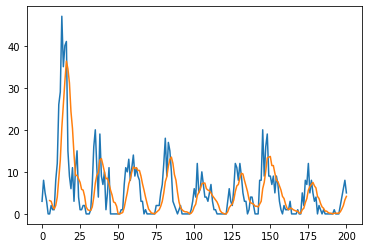

In [11]:
bike.loc[:200, "casual"].plot()
bike.loc[:200, "MA_c_6"].plot()

In [12]:
bike["EWMA_02"] = bike["count"].ewm(alpha = 0.2).mean()
bike["EWMA_08"] = bike["count"].ewm(alpha = 0.8).mean()

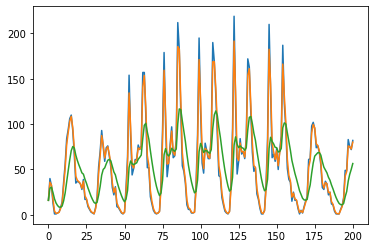

In [15]:
bike.loc[:200, "count"].plot()
bike.loc[:200, "EWMA_08"].plot()
bike.loc[:200, "EWMA_02"].plot()

In [16]:
iris = pd.read_csv("iris_xlsx.csv")
iris.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [ ]:
iris_t = iris.iloc[:2, :-1].transpose()
iris_t

In [20]:
iris_t["diff"] = iris_t[0] - iris_t[1]
sum(iris_t["diff"] ** 2) ** 0.5

0.5385164807134502

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [38]:
nor_minmax = MinMaxScaler().fit(iris.iloc[:, :-1]) # Min-Max 규칙 생성
nor_minmax

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
nor_minmax.transform(iris.iloc[:, :-1]) # 규칙 기반 자료 변환

In [43]:
iris_nor_minmax = pd.DataFrame(nor_minmax.transform(iris.iloc[:, :-1]),
                               columns = iris.columns[:4])
iris_nor_minmax.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0      0.222222     0.625000      0.067797     0.041667
1      0.166667     0.416667      0.067797     0.041667

In [32]:
iris_nor_minmax.agg(["min", "max"])

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
min           0.0          0.0           0.0          0.0
max           1.0          1.0           1.0          1.0

In [33]:
nor_minmax2 = MinMaxScaler().fit(iris.iloc[:3, :-1])
iris_nor_minmax2 = pd.DataFrame(nor_minmax2.transform(iris.iloc[:3, :-1]),
                                columns = iris.columns[:4])
iris_nor_minmax2

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           1.0          1.0           1.0          0.0
1           0.5          0.0           1.0          0.0
2           0.0          0.4           0.0          0.0

In [44]:
iris_nor_minmax3 = pd.DataFrame(nor_minmax.transform(iris.iloc[:3, :-1]),
                                columns = iris.columns[:4])
iris_nor_minmax3

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0      0.222222     0.625000      0.067797     0.041667
1      0.166667     0.416667      0.067797     0.041667
2      0.111111     0.500000      0.050847     0.041667

### Q1. iris 데이터를 표준화 하시오.
※ sklearn의 StandardScaler 를 사용하시오.

In [49]:
nor_std = StandardScaler().fit(iris.iloc[:, :-1])
iris_nor_std = pd.DataFrame(nor_std.transform(iris.iloc[:, :-1]),
                            columns = iris.columns[:4])
iris_nor_std.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0     -0.900681     1.019004     -1.340227    -1.315444
1     -1.143017    -0.131979     -1.340227    -1.315444

### Q2. Q1의 규칙을 사용하여 모든 변수의 값이 3인 데이터가 입력이 되었을 때 그 결과를 확인하시오.

In [50]:
iris_sample = pd.DataFrame([[3, 3, 3, 3]],
                           columns = iris.columns[:4])
iris_sample

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0             3            3             3            3

In [51]:
nor_std.transform(iris_sample)

array([[-3.44520645, -0.13197948, -0.4308277 ,  2.37025687]])

In [52]:
from sklearn.datasets import make_moons

In [63]:
X, Y = make_moons(n_samples = 200, noise = 0.2,
                  random_state = 123) # seed
df_moon = pd.concat([pd.DataFrame(X, columns = ["x", "y"]),
                     pd.Series(Y)], axis = 1)
df_moon.head(2)

x         y  0
0 -0.077962  1.062934  0
1  0.202304 -0.067724  1

In [ ]:
df_moon.plot.scatter(x = "x", y = "y", c = 0, colormap = "viridis")

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [73]:
X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size = 0.3,
                                          random_state = 123)
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X = X_tr, y = Y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
y_pred = model.predict(X_te)
accuracy_score(y_pred, Y_te)

1.0

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head(2)

In [80]:
df_train, df_test = train_test_split(df, train_size = 0.7,
                                     random_state = 123)
# print(len(df_train))
# print(len(df_test))

In [ ]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X = df_train.drop("Outcome", axis = 1),
          y = df_train["Outcome"])

In [82]:
pred = model.predict(df_test.drop("Outcome", axis = 1))
accuracy_score(y_true = df_test["Outcome"], y_pred = pred)

0.7272727272727273

In [83]:
from sklearn.neighbors import KNeighborsRegressor

In [84]:
iris = pd.read_csv("iris_xlsx.csv")

In [ ]:
iris_train, iris_test = train_test_split(iris, train_size = 0.7,
                                         random_state = 123)
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X = iris_train.iloc[:, :2],
          y = iris_train["Petal.Length"])

In [88]:
pred = model.predict(iris_test.iloc[:, :2])

In [89]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_true = iris_test["Petal.Length"],
                   y_pred = pred) ** 0.5 # RMSE

In [90]:
from sklearn.cluster import KMeans

In [91]:
df = pd.read_csv("iris_xlsx.csv")
df.head(1)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa

In [102]:
X = df.loc[:, :"Petal.Width"]
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0      5.901613     2.748387      4.393548     1.433871
1      5.006000     3.428000      1.462000     0.246000
2      6.850000     3.073684      5.742105     2.071053

In [121]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [107]:
kmeans = KMeans(n_clusters = 3, random_state = 123).fit(df.loc[:, :"Petal.Width"])
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0      5.006000     3.428000      1.462000     0.246000
1      6.850000     3.073684      5.742105     2.071053
2      5.901613     2.748387      4.393548     1.433871

### Q. 각 군집의 유클리드 거리를 확인하고 가장 가까운 군집의 번호와 거리를 반올림하여 소수점 둘 째 자리 까지 기술하시오
※ 정답 예시: 1, 2, 2.56

In [ ]:
cent_t = centroids.transpose()
cent_t

In [112]:
print(sum((cent_t[0] - cent_t[1]) ** 2) ** 0.5)
print(sum((cent_t[0] - cent_t[2]) ** 2) ** 0.5)
print(sum((cent_t[1] - cent_t[2]) ** 2) ** 0.5)

5.01756851975292
3.356934546956408
1.7971817988854317


In [113]:
round(sum((cent_t[1] - cent_t[2]) ** 2) ** 0.5, 2)

1.8

In [114]:
from sklearn.cluster import AgglomerativeClustering

In [115]:
df = pd.read_csv("iris_xlsx.csv")

In [117]:
model = AgglomerativeClustering(n_clusters = 3, 
                                affinity = "euclidean",
                                linkage = "ward")
pred = model.fit_predict(df.drop("Species", axis = 1))

In [118]:
df["cluster"] = pred
pd.crosstab(df["Species"], df["cluster"])

cluster      0   1   2
Species               
setosa       0  50   0
versicolor  49   0   1
virginica   15   0  35

In [120]:
df.groupby("cluster")[df.columns[:4]].mean().reset_index()

cluster  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0        0      5.920313     2.751563      4.420313     1.434375
1        1      5.006000     3.428000      1.462000     0.246000
2        2      6.869444     3.086111      5.769444     2.105556

In [122]:
from statsmodels.formula.api import ols

In [123]:
df = pd.read_csv("linear_regression_01.csv")
model = ols("y ~ x", data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.257
Date:                Thu, 22 Apr 2021   Prob (F-statistic):             0.0848
Time:                        17:01:50   Log-Likelihood:                -53.868
No. Observations:                  24   AIC:                             111.7
Df Residuals:                      22   BIC:                             114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9909      0.908      1.091      0.287      -0.893       2.875
x              0.3732      0.207      1.805      0.085      -0.056       0.802
==============================================================================
Omnibus:                        3.957   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                1.902
Skew:                           0.380   Prob(JB):                        0.386
Kurtosis:                       1.849   Cond. No.                         8.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df = pd.read_csv("linear_regression_01.csv")
model = ols("y ~ x", data = df).fit()
model.summary()

In [126]:
iris = pd.read_csv("iris_xlsx.csv")
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [128]:
iris = iris.rename(columns ={"Petal.Width": "PW", "Petal.Length": "PL"})

In [129]:
model = ols("PW ~ PL", data = iris).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PW   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           4.68e-86
Time:                        17:09:46   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3631      0.040     -9.131      0.000      -0.442      -0.285
PL             0.4158      0.010     43.387      0.000       0.397       0.435
==============================================================================
Omnibus:                        5.765   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.555
Skew:                           0.359   Prob(JB):                       0.0622
Kurtosis:                       3.611   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$PW = 0.4158 \times PL -0.3631$

In [130]:
bike = pd.read_csv("bike.csv")

In [131]:
bike_train, bike_test = train_test_split(bike, train_size = 0.7,
                                         random_state = 123)

In [132]:
bike_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [134]:
"casual ~ " + " + ".join(bike_train.columns[1:8])

'casual ~ season + holiday + workingday + weather + temp + atemp + humidity'

In [144]:
model = ols("casual ~ " + " + ".join(bike_train.columns[1:8]), data=bike_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     866.8
Date:                Thu, 22 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:31:46   Log-Likelihood:                -38399.
No. Observations:                7620   AIC:                         7.681e+04
Df Residuals:                    7612   BIC:                         7.687e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.8597      2.133     21.970      0.000      42.679      51.041
season         1.7213      0.407      4.226      0.000       0.923       2.520
holiday      -11.6908      2.672     -4.375      0.000     -16.929      -6.453
workingday   -37.1798      0.947    -39.249      0.000     -39.037     -35.323
weather        3.8208      0.740      5.161      0.000       2.370       5.272
temp           1.3641      0.327      4.173      0.000       0.723       2.005
atemp          1.4666      0.300      4.885      0.000       0.878       2.055
humidity      -0.9211      0.025    -36.571      0.000      -0.970      -0.872
==============================================================================
Omnibus:                     3164.361   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22059.065
Skew:                           1.840   Prob(JB):                         0.00
Kurtosis:                      10.479   Cond. No.                         455.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
pred = model.predict(bike_test.iloc[:, 1:8])
pred[:5]

6495    14.941223
7050     0.870564
558     42.393283
5085     2.202919
3328    79.354842
dtype: float64

In [136]:
mean_squared_error(y_true = bike_test["casual"], y_pred = pred) ** 0.5

37.61310972033154

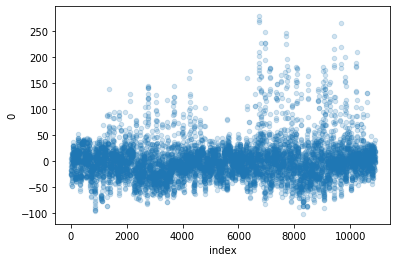

In [143]:
model.resid.reset_index().plot.scatter(x = "index", y = 0, alpha = 0.2)

In [147]:
bike_train.iloc[:, 1:8].corr().round(2)

season  holiday  workingday  weather  temp  atemp  humidity
season        1.00     0.03       -0.00     0.01  0.26   0.27      0.19
holiday       0.03     1.00       -0.25    -0.01  0.01  -0.00     -0.00
workingday   -0.00    -0.25        1.00     0.03  0.04   0.03     -0.01
weather       0.01    -0.01        0.03     1.00 -0.06  -0.06      0.40
temp          0.26     0.01        0.04    -0.06  1.00   0.99     -0.07
atemp         0.27    -0.00        0.03    -0.06  0.99   1.00     -0.04
humidity      0.19    -0.00       -0.01     0.40 -0.07  -0.04      1.00

In [150]:
import numpy as np
np.sqrt(16)

4.0

In [149]:
16 ** 0.5

4.0